# **Task :**
# **Stock Prediction :**
### Take stock price of any company you want and predicts its price by using LSTM.

In [49]:
import pandas as pd

# EDA

In [50]:
#pandas read AAPL csv file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [51]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [52]:
df.shape

(2035, 8)

# Separate the targeted stock prices

In [53]:
df1=df.reset_index()['Close']

In [54]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Stock

# Plot the actual stock prices

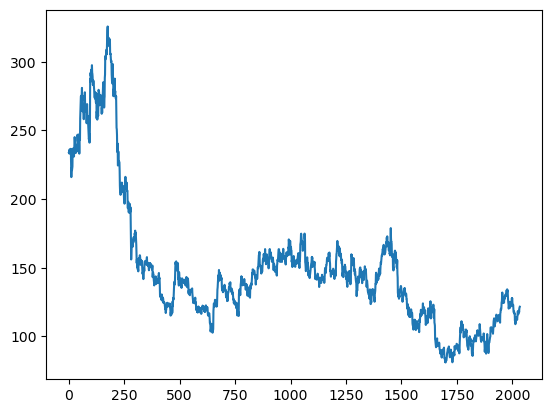

In [55]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [56]:
import numpy as np

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [58]:
df1 = df1.values.reshape(-1,1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df1 = scaler.fit_transform(df1)

# Split the data into train and test

In [59]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [60]:
training_size,test_size

(1322, 713)

### Make data for LSTM as X_train, y_train, X_test, y_test

In [61]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [62]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [63]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [64]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [65]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Build the LSTM model

In [66]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model

In [69]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


20/20 [==============================] - 7s 163ms/step - loss: 0.0304 - val_loss: 0.0043
Epoch 2/100
20/20 [==============================] - 2s 118ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 3/100
20/20 [==============================] - 2s 122ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 4/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0016 - val_loss: 9.5491e-04
Epoch 6/100
20/20 [==============================] - 2s 119ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 2s 122ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0013 - val_loss: 9.2045e-04
Epoch 9/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0015 - val_loss: 7.6173e-04
Epoch 10/100
20/20 [==============================] - 3s 132ms/step - loss: 0.0012 - val_lo

### Make Predictions

In [87]:
import tensorflow as tf

In [88]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 0s 21ms/step


In [89]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Plot the comparison between actual and predicted

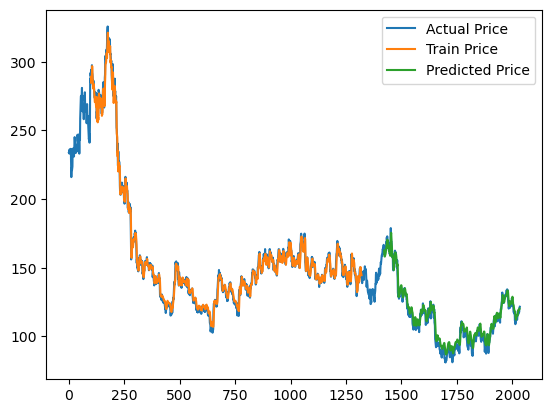

In [90]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label="Actual Price")
plt.plot(trainPredictPlot,label="Train Price")
plt.plot(testPredictPlot,label="Predicted Price")
plt.legend()
plt.show()

In [91]:
len(test_data)

713

### Predict next 30 days with last 100 days data

In [92]:
#taking last 100 days data
x_input=test_data[409:].reshape(1,-1)
x_input.shape


(1, 304)

### Split target data of last 100 days and 30 days

In [93]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
nextNumberOfDays = 28
i = 0

while i < nextNumberOfDays:

    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)

[[0.16845521330833435], [0.17150607705116272], [0.17400610446929932], [0.17616315186023712], [0.1780814379453659], [0.1798098236322403], [0.18138094246387482], [0.1828235387802124], [0.18416284024715424], [0.18541879951953888], [0.18660591542720795], [0.18773426115512848], [0.18881070613861084], [0.189840629696846], [0.19082865118980408], [0.19177940487861633], [0.19269785284996033], [0.19358906149864197], [0.19445832073688507], [0.1953105479478836], [0.1961502730846405], [0.19698138535022736], [0.19780674576759338], [0.19862841069698334], [0.19944749772548676], [0.20026448369026184], [0.20107890665531158], [0.20188991725444794]]


In [94]:
# demonstrate the prediction for next 10 days

In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,101+len(lst_output))

### Plot the continous 30 days prediction

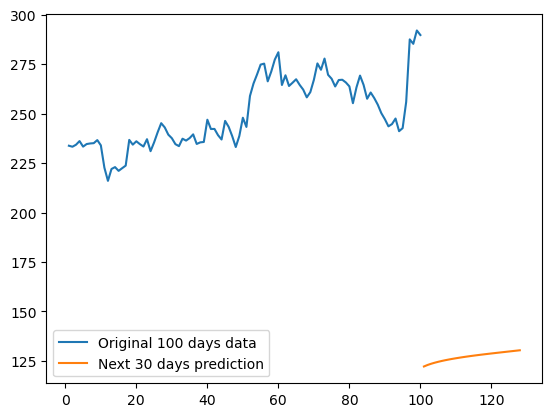

In [96]:
# Plot the original 100 days data
plt.plot(day_new, scaler.inverse_transform(df1[:100]), label='Original 100 days data')

# Plot the next 30 days prediction
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Next 30 days prediction')

plt.legend()
plt.show()


# Thank you